In [4]:
import os
from snn_delays.config import CHECKPOINT_PATH
from hwsnn.utils.model_loader import ModelLoader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
ckpt_dir = 'exp7_shd_50_b1024_sweep_learnig_rate_also_tau'
models_dir = os.path.join(CHECKPOINT_PATH, ckpt_dir)

models = []
batch_size = 256
device = 'cpu'
for _, __, files in os.walk(models_dir, topdown=False):
    for name in files:
        if '.py' not in name:
            models.append(name)

data_fd = []

for model_name in models:
    if 'max' in model_name and model_name[:2]=='lr':
        print(f"loading {model_name}")
        snn = ModelLoader(
            model_name, models_dir, batch_size, device, True)
        acc = snn.acc[-1][-1]
        data_fd.append([model_name.split('_')[0],model_name.split('_')[1], acc])
        # print(f"accuracy: {acc}")
        # print("-------------------------------------")

data_ffw = []

for model_name in models:
    if 'max' in model_name and 'ffw' in model_name:
        print(f"loading {model_name}")
        snn = ModelLoader(
            model_name, models_dir, batch_size, device, True)
        acc = snn.acc[-1][-1]
        data_ffw.append([model_name.split('_')[1],model_name.split('_')[2], acc])
        # print(f"accuracy: {acc}")
        # print("-------------------------------------")

data_rec = []

for model_name in models:
    if 'max' in model_name and 'rec' in model_name:
        print(f"loading {model_name}")
        snn = ModelLoader(
            model_name, models_dir, batch_size, device, True)
        acc = snn.acc[-1][-1]
        data_rec.append([model_name.split('_')[1],model_name.split('_')[2], acc])

loading lr0.0001_lrt0.0001_shd50_SNN_l2_48d16.t7_7963780918727915_max_99epoch

[INFO] Delays: tensor([ 0, 16, 32])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([ 0, 16, 32])

[INFO] Delays o: tensor([0])
1000.0
Delta t: 20.0 ms
mean of normal: -0.541324854612918
Instance of <class 'snn_delays.snn.SNN'> loaded successfully
loading lr0.0001_lrt0.001_shd50_SNN_l2_48d16.t7_7826855123674912_max_96epoch

[INFO] Delays: tensor([ 0, 16, 32])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([ 0, 16, 32])

[INFO] Delays o: tensor([0])
1000.0
Delta t: 20.0 ms
mean of normal: -0.541324854612918
Instance of <class 'snn_delays.snn.SNN'> loaded successfully
loading lr0.0001_lrt0.01_shd50_SNN_l2_48d16.t7_7707597173144876_max_85epoch

[INFO] Delays: tensor([ 0, 16, 32])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([ 0, 16, 32])

[INFO] Delays o: tensor([0])
1000.0
Delta t: 20.0 ms
mean of normal: -0.541324854612918
Instance of <class 'snn_delays.snn.SNN'> loaded successfully
l

In [8]:
data_ffw

[['lr0.0001', 'lrt0.0001', 44.25795053003534],
 ['lr0.0001', 'lrt0.001', 51.28091872791519],
 ['lr0.0001', 'lrt0.01', 65.54770318021201],
 ['lr0.0001', 'lrt0.1', 67.35865724381625],
 ['lr0.0001', 'lrt1.0', 46.3339222614841],
 ['lr0.001', 'lrt0.0001', 54.54946996466431],
 ['lr0.001', 'lrt0.001', 60.86572438162544],
 ['lr0.001', 'lrt0.01', 71.81978798586573],
 ['lr0.001', 'lrt0.1', 75.08833922261483],
 ['lr0.001', 'lrt1.0', 76.76678445229682],
 ['lr0.005', 'lrt0.0001', 44.302120141342755],
 ['lr0.005', 'lrt0.001', 51.10424028268551],
 ['lr0.005', 'lrt0.01', 56.802120141342755],
 ['lr0.005', 'lrt0.1', 70.09717314487632],
 ['lr0.005', 'lrt1.0', 72.43816254416961],
 ['lr0.01', 'lrt0.0001', 31.978798586572438],
 ['lr0.01', 'lrt0.001', 41.82862190812721],
 ['lr0.01', 'lrt0.01', 56.49293286219081],
 ['lr0.01', 'lrt0.1', 65.76855123674912],
 ['lr0.01', 'lrt1.0', 65.59187279151944]]

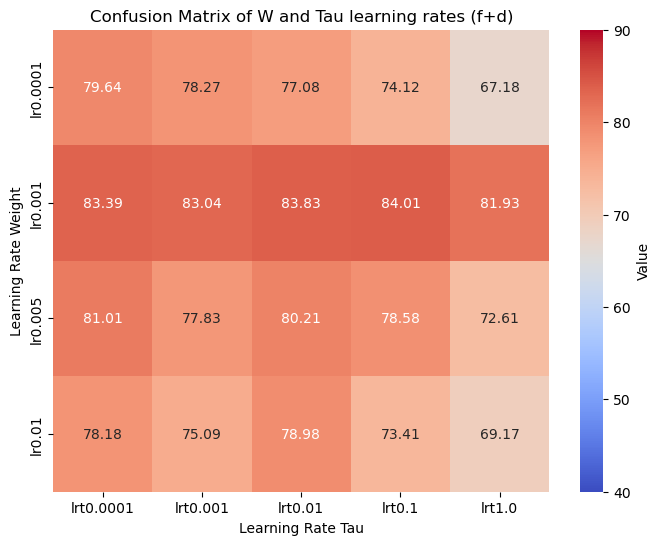

In [12]:
# Convert data to DataFrame
df = pd.DataFrame(data_fd, columns=['Learning Rate', 'Learning Rate Tau', 'Value'])

# Group by 'Learning Rate' and 'Learning Rate Tau', taking the average for duplicates
df_avg = df.groupby(['Learning Rate', 'Learning Rate Tau']).mean().reset_index()

# Pivot the DataFrame to create a matrix format for a heatmap
matrix_df_avg = df_avg.pivot(index="Learning Rate", columns="Learning Rate Tau", values="Value")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_df_avg, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Value'}, vmin=40, vmax=90)
plt.title("Confusion Matrix of W and Tau learning rates (f+d)")
plt.xlabel("Learning Rate Tau")
plt.ylabel("Learning Rate Weight")
plt.show()

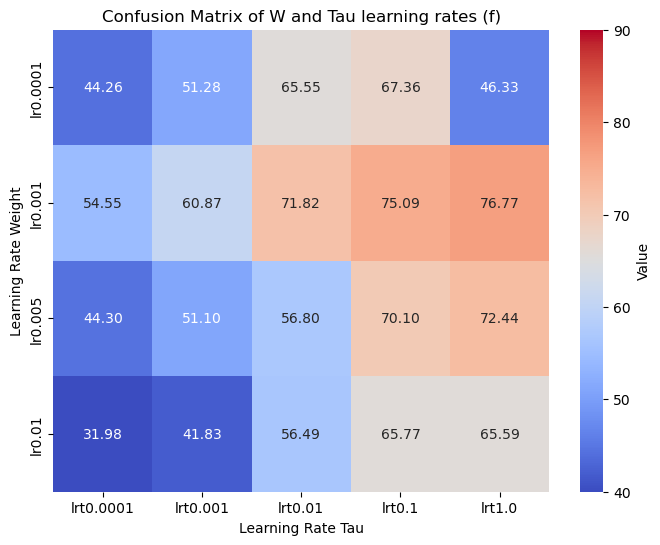

In [13]:
# Convert data to DataFrame
df = pd.DataFrame(data_ffw, columns=['Learning Rate', 'Learning Rate Tau', 'Value'])

# Group by 'Learning Rate' and 'Learning Rate Tau', taking the average for duplicates
df_avg = df.groupby(['Learning Rate', 'Learning Rate Tau']).mean().reset_index()

# Pivot the DataFrame to create a matrix format for a heatmap
matrix_df_avg = df_avg.pivot(index="Learning Rate", columns="Learning Rate Tau", values="Value")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_df_avg, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Value'}, vmin=40, vmax=90)
plt.title("Confusion Matrix of W and Tau learning rates (f)")
plt.xlabel("Learning Rate Tau")
plt.ylabel("Learning Rate Weight")
plt.show()

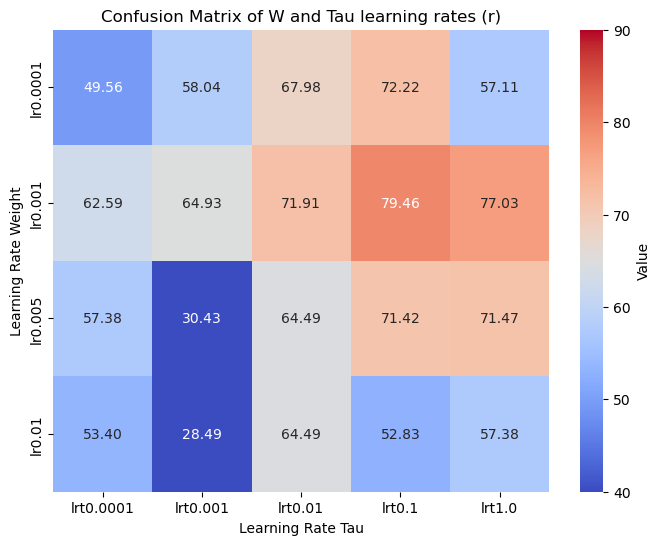

In [14]:
# Convert data to DataFrame
df = pd.DataFrame(data_rec, columns=['Learning Rate', 'Learning Rate Tau', 'Value'])

# Group by 'Learning Rate' and 'Learning Rate Tau', taking the average for duplicates
df_avg = df.groupby(['Learning Rate', 'Learning Rate Tau']).mean().reset_index()

# Pivot the DataFrame to create a matrix format for a heatmap
matrix_df_avg = df_avg.pivot(index="Learning Rate", columns="Learning Rate Tau", values="Value")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_df_avg, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Value'}, vmin=40, vmax=90)
plt.title("Confusion Matrix of W and Tau learning rates (r)")
plt.xlabel("Learning Rate Tau")
plt.ylabel("Learning Rate Weight")
plt.show()

OLD

In [5]:
import os
from snn_delays.config import CHECKPOINT_PATH
from hwsnn.utils.model_loader import ModelLoader
ckpt_dir = 'exp_soa50_1024_learning_rate_final'
models_dir = os.path.join(CHECKPOINT_PATH, ckpt_dir)

models = []
batch_size = 256
device = 'cpu'
for _, __, files in os.walk(models_dir, topdown=False):
    for name in files:
        if '.py' not in name:
            models.append(name)

m = []

for model_name in models:
    if 'max' in model_name:
        print(f"loading {model_name}")
        snn = ModelLoader(
            model_name, models_dir, batch_size, device, True)
        acc = snn.acc[-1][-1]
        m.append([model_name, acc])
        print(f"accuracy: {acc}")
        print("-------------------------------------")



loading delay_lr0.0001_shd50_SNN_l2_64d16.t7_79726148409894_max_100epoch

[INFO] Delays: tensor([ 0, 16, 32, 48])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([ 0, 16, 32, 48])

[INFO] Delays o: tensor([0])
0
[WARNING]: delta_t not defined
mean of normal: -2.414349516257962
Instance of <class 'snn_delays.snn.SNN'> loaded successfully
accuracy: 79.726148409894
-------------------------------------
loading delay_lr0.0005_shd50_SNN_l2_64d16.t7_7977031802120142_max_75epoch

[INFO] Delays: tensor([ 0, 16, 32, 48])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([ 0, 16, 32, 48])

[INFO] Delays o: tensor([0])
0
[WARNING]: delta_t not defined
mean of normal: -2.414349516257962
Instance of <class 'snn_delays.snn.SNN'> loaded successfully
accuracy: 79.77031802120142
-------------------------------------
loading delay_lr0.001_shd50_SNN_l2_64d16.t7_8109540636042402_max_50epoch

[INFO] Delays: tensor([ 0, 16, 32, 48])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([ 0, 16,

c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\torch\serialization.py:1113: SourceChangeWarning: source code of class 'snn_delays.snn.SNN' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)



[INFO] Delays: tensor([ 0, 16, 32, 48])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([ 0, 16, 32, 48])

[INFO] Delays o: tensor([0])
0
[WARNING]: delta_t not defined
mean of normal: -2.414349516257962
Instance of <class 'snn_delays.snn.SNN'> loaded successfully
accuracy: 69.96466431095406
-------------------------------------
loading delay_lr0.01_shd50_SNN_l2_64d16.t7_7230565371024736_max_77epoch

[INFO] Delays: tensor([ 0, 16, 32, 48])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([ 0, 16, 32, 48])

[INFO] Delays o: tensor([0])
0
[WARNING]: delta_t not defined
mean of normal: -2.414349516257962
Instance of <class 'snn_delays.snn.SNN'> loaded successfully
accuracy: 72.30565371024736
-------------------------------------
loading delay_lr1e-05_shd50_SNN_l2_64d16.t7_3652826855123675_max_100epoch

[INFO] Delays: tensor([ 0, 16, 32, 48])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([ 0, 16, 32, 48])

[INFO] Delays o: tensor([0])
0
[WARNING]: delta_t not defined

In [6]:
m

[['delay_lr0.0001_shd50_SNN_l2_64d16.t7_79726148409894_max_100epoch',
  79.726148409894],
 ['delay_lr0.0005_shd50_SNN_l2_64d16.t7_7977031802120142_max_75epoch',
  79.77031802120142],
 ['delay_lr0.001_shd50_SNN_l2_64d16.t7_8109540636042402_max_50epoch',
  81.09540636042402],
 ['delay_lr0.002_shd50_SNN_l2_64d16.t7_8295053003533569_max_24epoch',
  82.95053003533569],
 ['delay_lr0.003_shd50_SNN_l2_64d16.t7_7734098939929329_max_74epoch',
  77.34098939929329],
 ['delay_lr0.004_shd50_SNN_l2_64d16.t7_8149293286219081_max_38epoch',
  81.49293286219081],
 ['delay_lr0.005_shd50_SNN_l2_64d16.t7_7628091872791519_max_80epoch',
  76.28091872791519],
 ['delay_lr0.006_shd50_SNN_l2_64d16.t7_8100706713780919_max_39epoch',
  81.00706713780919],
 ['delay_lr0.007_shd50_SNN_l2_64d16.t7_8206713780918727_max_31epoch',
  82.06713780918727],
 ['delay_lr0.008_shd50_SNN_l2_64d16.t7_79726148409894_max_72epoch',
  79.726148409894],
 ['delay_lr0.009_shd50_SNN_l2_64d16.t7_6996466431095406_max_77epoch',
  69.9646643109